In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import Purity_Measure as pm
from utils import Concurrence_Measure as con

In [3]:
def c_mems(P): # P --> Purity
    if P >= 5/9. and P<=1:
        cmems = 0.5*(1 + np.sqrt(2*P-1))
    elif P<5/9. and P>=1/3.:
        cmems = np.sqrt(2*P - 2/3.)
    else:
        cmems = 0

    return cmems

def c_w(P):
    if P >= 1/3. and P <= 1:
        cw = 0.5*(np.sqrt(12*P-3)-1)
    else:
        cw = 0
    return cw

In [5]:
purity = np.linspace(0, 1, 100000)

C_M = list(map(c_mems, purity))
C_M_array = np.array(C_M)

C_W = list(map(c_w, purity))
C_W_array = np.array(C_W)

con_eng_list, pur_eng_list = pd.read_pickle('../../Distributions/Simulation/brute_force_distro_gen/plots/con_list_pur_list_choice_k_fit.pickle')
con_eng = con_eng_list[2]
pur_eng = pur_eng_list[2]

tomo_test, dm_test, dm_mle = pd.read_pickle(f'../../Distributions/IBMQ/test_data/testdata_qubit_size_2.pkl')
con_test = con.concurrence(dm_mle)
pur_test = pm.purity(dm_mle)

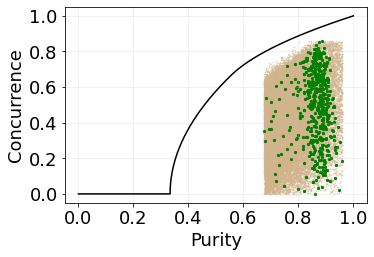

In [6]:
fs = 18
plt.plot(purity, C_M_array, 'k-')
# plt.plot(purity, C_W_array, 'k-')
# plt.scatter(pur_test[:5000], con_test[:5000], c=np.repeat('m', len(pur_test[:5000])), s=6)
# if len(pur_test) > 5000:
#     plt.scatter(pur_train[5000:], con_train[5000:], c=np.repeat('b', len(pur_train[5000:])), s=6,
#                 label='Separable States')
#     # plt.legend()
# plt.scatter(pur_test, con_test, vmin=0.35, vmax=1., c=fids_mean_valid[j], s=6)
plt.scatter(pur_eng, con_eng, c='tan', s=0.5, alpha=0.5)
plt.scatter(pur_test, con_test, c = 'g', s=5)
plt.xlabel('Purity', fontsize=fs)
plt.ylabel('Concurrence', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# plt.colorbar()
plt.grid(alpha=0.2)
plt.subplots_adjust(bottom=0.2, left=0.2)

# plt.savefig(f'IBMQ_ENG.svg')
# plt.savefig(f'IBMQ_ENG.png')
plt.show()